## Configurações iniciais

In [1]:
# Importa as bibliotecas que serão utilizadas na análise.

import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Lê o .csv que contém os reviews e os salva em um DataFrame.
data = pd.read_csv("beer_reviews.csv")

In [3]:
# Exibe o DataFrame gerado na célula anterior.
data

,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid
0,10325,Vecchio Birraio,1234817823,1.5,2.0,2.5,stcules,Hefeweizen,1.5,1.5,Sausa Weizen,5.0,47986
1,10325,Vecchio Birraio,1235915097,3.0,2.5,3.0,stcules,English Strong Ale,3.0,3.0,Red Moon,6.2,48213
2,10325,Vecchio Birraio,1235916604,3.0,2.5,3.0,stcules,Foreign / Export Stout,3.0,3.0,Black Horse Black Beer,6.5,48215
3,10325,Vecchio Birraio,1234725145,3.0,3.0,3.5,stcules,German Pilsener,2.5,3.0,Sausa Pils,5.0,47969
4,1075,Caldera Brewing Company,1293735206,4.0,4.5,4.0,johnmichaelsen,American Double / Imperial IPA,4.0,4.5,Cauldron DIPA,7.7,64883
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1586609,14359,The Defiant Brewing Company,1162684892,5.0,4.0,3.5,maddogruss,Pumpkin Ale,4.0,4.0,The Horseman's Ale,5.2,33061
1586610,14359,The Defiant Brewing Company,1161048566,4.0,5.0,2.5,yelterdow,Pumpkin Ale,2.0,4.0,The Horseman's Ale,5.2,33061
1586611,14359,The Defiant Brewing Company,1160702513,4.5,3.5,3.0,TongoRad,Pumpkin Ale,3.5,4.0,The Horseman's Ale,5.2,33061
1586612,14359,The Defiant Brewing Company,1160023044,4.0,4.5,4.5,dherling,Pumpkin Ale,4.5,4.5,The Horseman's Ale,5.2,33061


## Estilos de cerveja mais consumidos pelos brasileiros 

Segundo a pesquisa "Retrato dos consumidores de Cerveja 2023", divulgada em dezembro de 2023 pelo site "Surra de Lúpulo", juntamente do Sindicato Nacional da Industria da Cerveja (Sindicerv), os estilos de cerveja mais consumidos pelo brasileiro são:

1. *IPA (India Pale Ale)*
2. *Weissbier*
3. *Pilsen*
4. *American Lager*
5. *APA (American Pale Ale)*

*Link da pesquisa:* https://www.sindicerv.com.br/noticias/ipa-pilsen-e-mais-pesquisa-revela-os-estilos-de-cervejas-preferidos-dos-consumidores/  

Para cada um dos estilos de cerveja mencionados, há representantes bem conhecidos no Brasil. Para os apreciadores de IPA, a Colorado Indica é uma excelente escolha. Se você gosta de Weissbier, a Eisenbahn Weizen é uma ótima opção. No que diz respeito às Pilsners, é comum que no Brasil elas sejam confundidas com American Lagers. Entre essas categorias, há diversas opções amplamente consumidas, como Brahma, Skol e Antártica. Finalmente, para quem prefere APA, a Colorado Appia é uma ótima opção.

Dito isso, vejamos as avaliações de algumas cervejas que seguem os estilos citadas na célula anterior.

### Análise de algumas cervejas brasileiras dos estilos mais populares no Brasil

#####
Com o intuito de facilitar o trabalho de análise, vamos criar um dicionário que guarda os estilos de cerveja mais consumidos pelos brasileiros juntamente de algumas cervejas que representam tais estilos.

In [4]:
# Cria um dicionário que contém os estilos de cerveja mais consumidos pelos brasileiros. Cada estilo de cerveja tem uma ou mais cervejas 
# como suas representantes, e cada uma dessas cervejas possui um DataFrame que armazena os reviews relacionados a ela ou, no caso de algumas 
# cervejas, a ela e suas variantes.

beer_dict = {
    'India Pale Ale':{
        'Colorado Indica':pd.DataFrame()
    },
    'Weissbier':{
        'Eisenbahn Weizenbier':pd.DataFrame()
    },
    'Pilsen/American Lager':{
        'Skol':pd.DataFrame(),
        'Antarctica':pd.DataFrame(),
        'Brahma':pd.DataFrame()
    },
    'American Pale Ale':{
        'Colorado Appia':pd.DataFrame()
    }
}

###
Feito isso, vamos obter os dados sobre as cervejas que colocamos no dicionário acima.

#### IPA (India Pale Ale)

In [5]:
# Nesta célula serão exibidos os reviews sobre a cerveja Colorado Indica.

# Guarda os reviews sobre a cerveja em questão no dicionário "beer_dict".
beer_dict['India Pale Ale']['Colorado Indica'] = data[data['beer_name'] == 'Colorado Indica']

# Exibe tais reviews.
beer_dict['India Pale Ale']['Colorado Indica']

,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid
459453,10729,Cervejaria Colorado,1232995086,3.5,3.5,4.0,DoubleJ,English India Pale Ale (IPA),4.0,3.5,Colorado Indica,7.0,21562
459454,10729,Cervejaria Colorado,1209655891,4.5,3.5,4.0,errantnight,English India Pale Ale (IPA),4.0,4.0,Colorado Indica,7.0,21562


#### Weissbier

In [6]:
# Nesta célula serão exibidos os reviews sobre a cerveja Eisenbahn Weizen.

# Guarda os reviews sobre a cerveja em questão no dicionário "beer_dict".
beer_dict['Weissbier']['Eisenbahn Weizenbier'] = data[data['beer_name'] == "Eisenbahn Weizenbier"]

# Exibe tais reviews.
beer_dict['Weissbier']['Eisenbahn Weizenbier']

,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid
568556,10096,Cervejaria Sudbrack Ltda,1311044048,4.0,3.5,3.5,fmccormi,Hefeweizen,4.0,3.5,Eisenbahn Weizenbier,4.8,19606
568557,10096,Cervejaria Sudbrack Ltda,1306008941,3.5,4.0,3.5,Northsider,Hefeweizen,3.5,3.5,Eisenbahn Weizenbier,4.8,19606
568558,10096,Cervejaria Sudbrack Ltda,1262803328,3.5,3.5,3.5,brdc,Hefeweizen,3.5,3.5,Eisenbahn Weizenbier,4.8,19606
568559,10096,Cervejaria Sudbrack Ltda,1235977262,4.0,3.0,3.0,CrazyDavros,Hefeweizen,4.0,3.5,Eisenbahn Weizenbier,4.8,19606
568560,10096,Cervejaria Sudbrack Ltda,1233621676,4.0,3.5,3.5,Halcyondays,Hefeweizen,4.5,3.5,Eisenbahn Weizenbier,4.8,19606
568561,10096,Cervejaria Sudbrack Ltda,1232993429,4.0,4.0,4.0,DoubleJ,Hefeweizen,4.0,4.0,Eisenbahn Weizenbier,4.8,19606
568563,10096,Cervejaria Sudbrack Ltda,1225707129,3.5,4.0,3.5,koolk,Hefeweizen,3.0,3.5,Eisenbahn Weizenbier,4.8,19606
568564,10096,Cervejaria Sudbrack Ltda,1158100921,3.0,4.5,4.0,sewald,Hefeweizen,3.0,3.5,Eisenbahn Weizenbier,4.8,19606
568565,10096,Cervejaria Sudbrack Ltda,1144934136,4.0,4.0,4.0,schiaveto,Hefeweizen,4.0,3.5,Eisenbahn Weizenbier,4.8,19606
568566,10096,Cervejaria Sudbrack Ltda,1128476265,5.0,4.5,4.5,decom,Hefeweizen,4.5,4.5,Eisenbahn Weizenbier,4.8,19606


#### Pilsen / American Lager

##### Skol

In [7]:
# Nesta célula serão exibidos os reviews sobre a cerveja Skol.

# Perceba que nessa célula estamos usando o "startswith" para pesquisar sobre os reviews da cerveja em questão, ao invês de pesquisar 
# somente pelo nome de tal cerveja. Estamos fazendo isso pois existem várias variações da cerveja pesquisada.

# Guarda os reviews sobre as variantes da cerveja em questão no dicionário "beer_dict".
beer_dict['Pilsen/American Lager']['Skol'] = data[data['beer_name'].str.startswith("Skol", na=False)]

# Exibe tais reviews.
beer_dict['Pilsen/American Lager']['Skol']


,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid
211225,8535,Carlsberg-Tetley Brewing Ltd,1306186811,3.5,3.0,3.0,fullsweep,German Pilsener,3.0,3.5,Skol Lager,3.0,69398
1007519,15781,Carlsberg Breweries A/S,1316501812,4.0,4.0,3.0,ElCommodoro,Euro Strong Lager,4.0,4.0,Skol Super,9.0,53174
1007521,15781,Carlsberg Breweries A/S,1258053598,3.0,2.0,4.0,soulgrowl,Euro Strong Lager,3.0,3.0,Skol Super,9.0,53174
1007522,15781,Carlsberg Breweries A/S,1254865595,1.0,1.5,2.5,DerBayer,Euro Strong Lager,2.0,1.0,Skol Super,9.0,53174
1128912,9033,Turk Tuborg Brewing and Malting,1262360329,3.5,3.5,3.5,tone77,Euro Pale Lager,3.0,3.0,Skol Beer,NaN,34716
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1494785,2437,Cervejarias Reunidas Skol-Caracu,1313276657,3.0,2.0,3.0,WoodBrew,American Adjunct Lager,3.0,3.0,Skol Beats,5.2,18308
1494786,2437,Cervejarias Reunidas Skol-Caracu,1259708785,1.5,1.0,2.0,DoubleJ,American Adjunct Lager,2.0,2.0,Skol Beats,5.2,18308
1494787,2437,Cervejarias Reunidas Skol-Caracu,1146512251,3.0,2.5,3.5,schiaveto,American Adjunct Lager,3.0,2.5,Skol Beats,5.2,18308
1494788,2437,Cervejarias Reunidas Skol-Caracu,1110632963,2.5,2.0,2.0,BeerResearcher,American Adjunct Lager,2.5,2.5,Skol Beats,5.2,18308


##### Antarctica

In [8]:
# Nesta célula serão exibidos os reviews sobre a cerveja Antarctica.

# Perceba que nessa célula estamos usando o "startswith" para pesquisar sobre os reviews da cerveja em questão, ao invês de pesquisar 
# somente pelo nome de tal cerveja. Estamos fazendo isso pois existem várias variações da cerveja pesquisada.

# Guarda os reviews sobre as variantes da cerveja em questão no dicionário "beer_dict".
beer_dict['Pilsen/American Lager']['Antarctica'] = data[data['beer_name'].str.startswith("Antarctica", na=False)]

# Exibe tais reviews.
beer_dict['Pilsen/American Lager']['Antarctica']


,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid
1574383,2479,Antarctica (Companhia Brasileira De Bebidas),1294066796,4.0,2.5,3.5,smcreator,American Adjunct Lager,3.0,3.0,Antarctica Pilsen,5.0,6395
1576014,2479,Antarctica (Companhia Brasileira De Bebidas),1157807933,1.0,1.0,2.0,Helfst,American Adjunct Lager,1.0,1.5,Antarctica Chopp Claro,5.0,23492
1576017,2479,Antarctica (Companhia Brasileira De Bebidas),1304902931,2.0,2.5,2.0,cervezango,American Adjunct Lager,2.5,2.5,Antarctica Pilsen,5.0,6395
1576034,2479,Antarctica (Companhia Brasileira De Bebidas),1313342656,3.0,2.0,3.0,WoodBrew,American Adjunct Lager,3.0,3.0,Antarctica Pilsen,5.0,6395
1576035,2479,Antarctica (Companhia Brasileira De Bebidas),1312170750,1.0,1.5,2.0,dansmcd,American Adjunct Lager,2.0,1.0,Antarctica Pilsen,5.0,6395
1576036,2479,Antarctica (Companhia Brasileira De Bebidas),1305984228,2.5,3.0,3.0,Northsider,American Adjunct Lager,2.5,2.5,Antarctica Pilsen,5.0,6395
1576037,2479,Antarctica (Companhia Brasileira De Bebidas),1305156363,2.5,1.5,2.0,cambabeer,American Adjunct Lager,3.0,2.0,Antarctica Pilsen,5.0,6395
1576038,2479,Antarctica (Companhia Brasileira De Bebidas),1261157094,3.0,1.5,3.5,Halcyondays,American Adjunct Lager,2.0,2.5,Antarctica Pilsen,5.0,6395
1576039,2479,Antarctica (Companhia Brasileira De Bebidas),1252136825,3.5,3.5,2.5,HalfFull,American Adjunct Lager,2.5,3.0,Antarctica Pilsen,5.0,6395
1576040,2479,Antarctica (Companhia Brasileira De Bebidas),1239579056,5.0,1.0,2.0,Jmoore50,American Adjunct Lager,2.5,3.0,Antarctica Pilsen,5.0,6395


##### Brahma

In [9]:
# Nesta célula serão exibidos os reviews sobre a cerveja Brahma.

# Perceba que nessa célula estamos usando o "startswith" para pesquisar sobre os reviews da cerveja em questão, ao invês de pesquisar somente 
# pelo nome de tal cerveja. Estamos fazendo isso pois existem várias variações da cerveja pesquisada.

# Guarda os reviews sobre as variantes da cerveja em questão no dicionário "beer_dict".
beer_dict['Pilsen/American Lager']['Brahma'] = data[data['beer_name'].str.startswith("Brahma", na=False)]

# Exibe tais reviews.
beer_dict['Pilsen/American Lager']['Brahma']

,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid
272143,2444,Companhia Cervejaria Brahma,1144439334,2.5,2.0,3.0,JanM,American Adjunct Lager,2.0,2.0,Brahma,4.6,23381
272154,2444,Companhia Cervejaria Brahma,1067656824,2.5,2.0,2.5,fattyre,American Adjunct Lager,2.0,2.5,Brahma Extra,5.5,7366
274879,2444,Companhia Cervejaria Brahma,1305156154,3.0,1.5,1.5,cambabeer,American Adjunct Lager,3.0,2.5,Brahma Chopp,5.0,7447
274904,2444,Companhia Cervejaria Brahma,1229207844,4.0,2.5,4.0,orsulacp,Milk / Sweet Stout,3.0,3.0,Brahma Black,NaN,46590
274905,2444,Companhia Cervejaria Brahma,1247066142,3.0,2.0,3.0,FrothyBeverage,Munich Helles Lager,2.0,3.0,Brahma Bier,NaN,30104
...,...,...,...,...,...,...,...,...,...,...,...,...,...
275070,2444,Companhia Cervejaria Brahma,1207680322,4.5,3.0,2.0,MrWiggles,Schwarzbier,4.0,4.0,Brahma Malzbier,4.0,6133
275071,2444,Companhia Cervejaria Brahma,1146517417,2.0,1.5,1.5,schiaveto,Schwarzbier,2.5,1.5,Brahma Malzbier,4.0,6133
275072,2444,Companhia Cervejaria Brahma,1072912074,2.0,2.5,3.0,Ahhdball,Schwarzbier,2.0,2.0,Brahma Malzbier,4.0,6133
275073,2444,Companhia Cervejaria Brahma,1062208572,3.5,4.0,2.5,TheLongBeachBum,Schwarzbier,3.5,3.5,Brahma Malzbier,4.0,6133


#### APA (American Pale Ale)

##### Colorado Appia

In [10]:
# Nesta célula serão exibidos os reviews sobre a cerveja Colorado Appia.

# Guarda os reviews sobre a cerveja em questão no dicionário "beer_dict".
beer_dict['American Pale Ale']['Colorado Appia'] = data[data['beer_name'] == 'Colorado Appia']

# Exibe tais reviews.
beer_dict['American Pale Ale']['Colorado Appia']

,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid
459456,10729,Cervejaria Colorado,1260113394,2.5,2.5,3.5,DoubleJ,American Pale Wheat Ale,3.5,2.5,Colorado Appia,5.5,21561
459457,10729,Cervejaria Colorado,1215746727,4.0,3.5,3.0,Jespao,American Pale Wheat Ale,3.0,3.0,Colorado Appia,5.5,21561


## Avaliação de algumas cervejarias nacionais

Serão avaliadas aqui as cervejarias que produzem as cervejas que citamos em "Análise de algumas cervejas brasileiras dos estilos mais populares no Brasil".

#####

De antemão, veja que tanto a "Colorado Indica" *(India Pale Ale)* quanto a "Colorado Appia" *(American Pale Ale)* são produzidas pela "Cervejaria Colorado", que é uma cervejaria brasileira.

In [11]:
data[data['beer_name'] == 'Colorado Appia']['brewery_name'].unique()

array(['Cervejaria Colorado'], dtype=object)

In [12]:
data[data['beer_name'] == 'Colorado Indica']['brewery_name'].unique()

array(['Cervejaria Colorado'], dtype=object)

####
Dito isso, vejamos agora quais cervejarias produzem as demais cervejas que analisamos em "Análise de algumas cervejas brasileiras dos estilos mais populares no Brasil".

##### Eisenbahn Weizenbier

In [13]:
# Quem produz a cerveja 'Eisenbahn Weizenbier' (Weissbier) ?

data[data['beer_name'] == 'Eisenbahn Weizenbier']['brewery_name'].unique()

array(['Cervejaria Sudbrack Ltda'], dtype=object)

##### Skol

In [14]:
# Quem produz a cerveja 'Skol' (Pilsen / American Lager) ?

data[data['beer_name'].str.startswith('Skol')]['brewery_name'].unique()

array(['Carlsberg-Tetley Brewing Ltd', 'Carlsberg Breweries A/S',
       'Turk Tuborg Brewing and Malting',
       'Cervejarias Reunidas Skol-Caracu'], dtype=object)

In [19]:
# Perceba que na célula acima apenas uma cervejaria é brasileira, que no caso é a 'Cervejarias Reunidas Skol-Caracu', vejamos qual cerveja
# 'Skol' é produzida por eles.

data[data['brewery_name'] == 'Cervejarias Reunidas Skol-Caracu']['beer_name'].unique()

# É interessante que trabalhemos apenas com as cervejas 'Skol' exibidas como saída dessa célula.

array(['Skol', 'Skol Chopp Claro', 'Caracu', 'Skol Beats'], dtype=object)

##### Antarctica

In [20]:
# Quem produz a cerveja 'Antarctica' (Pilsen / American Lager) ?

data[data['beer_name'].str.startswith('Antarctica', na=False)]['brewery_name'].unique()

array(['Antarctica (Companhia Brasileira De Bebidas)'], dtype=object)

##### Brahma

In [21]:
# Quem produz a cerveja 'Brahma' (Pilsen / American Lager) ?

data[data['beer_name'].str.startswith('Brahma',na=False)]['brewery_name'].unique()

array(['Companhia Cervejaria Brahma',
       'Cervecería y Maltería Quilmes / Grupo Bemberg'], dtype=object)

In [23]:
# Das cervejarias acima, apenas a 'Companhia Cervejaria Brahma' é brasileira. Por conta disso, vejamos quais cervejas 'Brahma' são produzidas
# por tal cervejaria.

data[data['brewery_name'] == 'Companhia Cervejaria Brahma']['beer_name'].unique()

array(['Brahma', 'Brahma Extra', 'Brahma Chopp', 'Brahma Black',
       'Brahma Bier', 'Liber', 'Brahma Bock', 'Brahma Light',
       'Brahma Malzbier'], dtype=object)

## Avaliando as melhores cervejarias

In [24]:
# Encontrando a cervejaria com maior overall
data.sort_values(by='review_overall', ascending=False)

,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid
793307,579,Kona Brewing Co.,1293809208,5.0,2.5,3.0,vfgccp,American Pale Ale (APA),4.0,3.5,Fire Rock Pale Ale,5.8,5753
591801,1549,Goose Island Beer Co.,1180667386,5.0,5.0,4.5,bort11,American Double / Imperial Stout,5.0,4.5,Bourbon County Brand Stout,14.5,10672
591818,1549,Goose Island Beer Co.,1175185922,5.0,5.0,5.0,Beezor,American Double / Imperial Stout,4.5,5.0,Bourbon County Brand Stout,14.5,10672
591819,1549,Goose Island Beer Co.,1175135314,5.0,4.5,4.0,zeff80,American Double / Imperial Stout,4.5,5.0,Bourbon County Brand Stout,14.5,10672
591824,1549,Goose Island Beer Co.,1173843941,5.0,4.5,3.5,klewis,American Double / Imperial Stout,5.0,5.0,Bourbon County Brand Stout,14.5,10672
...,...,...,...,...,...,...,...,...,...,...,...,...,...
653706,1412,Red Rock Brewing Company,1030008142,0.0,3.0,0.0,beernut7,American Amber / Red Ale,2.5,3.5,Red Rock Amber Ale,4.0,3787
37234,1413,Desert Edge Brewery,1030197670,0.0,2.0,0.0,beernut7,Czech Pilsener,3.0,2.0,Pub Pils,4.0,3806
653695,1412,Red Rock Brewing Company,1030007859,0.0,2.0,0.0,beernut7,Hefeweizen,2.5,2.0,Red Rock Bavarian Weiss,4.0,3788
39667,1413,Desert Edge Brewery,1030266889,0.0,3.0,0.0,beernut7,American Pale Ale (APA),2.0,2.0,Utah Pale Ale,4.0,3810


Percebendo que há muitas cervejas com score 5.0 de overall, pensei em criar uma nova coluna com a média geométrica das colunas review_aroma, review_appearance, review_palate e review_taste.

_Por que uma média geométrica?_
- Médias geométricas punem desvios com muito mais força que médias aritméticas. Usando essa estratégia, talvez possamos encontrar a cervejaria com a nota mais sólida. Assim, talvez tenhamos uma avaliação mais rigorosa.

In [25]:
reviews = ['review_aroma', 'review_appearance', 'review_palate', 'review_taste']
data['geom_mean'] = sp.stats.mstats.gmean(data[reviews], axis=1).round(2)
display(data)

,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid,geom_mean
0,10325,Vecchio Birraio,1234817823,1.5,2.0,2.5,stcules,Hefeweizen,1.5,1.5,Sausa Weizen,5.0,47986,1.83
1,10325,Vecchio Birraio,1235915097,3.0,2.5,3.0,stcules,English Strong Ale,3.0,3.0,Red Moon,6.2,48213,2.87
2,10325,Vecchio Birraio,1235916604,3.0,2.5,3.0,stcules,Foreign / Export Stout,3.0,3.0,Black Horse Black Beer,6.5,48215,2.87
3,10325,Vecchio Birraio,1234725145,3.0,3.0,3.5,stcules,German Pilsener,2.5,3.0,Sausa Pils,5.0,47969,2.98
4,1075,Caldera Brewing Company,1293735206,4.0,4.5,4.0,johnmichaelsen,American Double / Imperial IPA,4.0,4.5,Cauldron DIPA,7.7,64883,4.24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1586609,14359,The Defiant Brewing Company,1162684892,5.0,4.0,3.5,maddogruss,Pumpkin Ale,4.0,4.0,The Horseman's Ale,5.2,33061,3.87
1586610,14359,The Defiant Brewing Company,1161048566,4.0,5.0,2.5,yelterdow,Pumpkin Ale,2.0,4.0,The Horseman's Ale,5.2,33061,3.16
1586611,14359,The Defiant Brewing Company,1160702513,4.5,3.5,3.0,TongoRad,Pumpkin Ale,3.5,4.0,The Horseman's Ale,5.2,33061,3.48
1586612,14359,The Defiant Brewing Company,1160023044,4.0,4.5,4.5,dherling,Pumpkin Ale,4.5,4.5,The Horseman's Ale,5.2,33061,4.50


Agora, ordenamos pela média geométrica.

In [26]:
data = data.sort_values(by='geom_mean', ascending=False)
display(data)

,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid,geom_mean
881415,147,Stone Brewing Co.,1277233394,4.5,5.0,5.0,itfitz,Russian Imperial Stout,5.0,5.0,Stone Imperial Russian Stout,10.50,1160,5.0
1171690,10099,Dogfish Head Brewery,1047816637,5.0,5.0,5.0,Jdiddy,American IPA,5.0,5.0,60 Minute IPA,6.00,6108,5.0
362174,945,Brasserie Belle-Vue,1048176320,5.0,5.0,5.0,AtrumAnimus,Lambic - Fruit,5.0,5.0,Belle Vue Framboise,5.20,5356,5.0
995488,15237,De Struise Brouwers,1319680620,5.0,5.0,5.0,redleaves,Quadrupel (Quad),5.0,5.0,Pannepot,10.00,34306,5.0
698771,130,Boulder Beer / Wilderness Pub,1246114432,5.0,5.0,5.0,jfitzy78,American Brown Ale,5.0,5.0,Flashback Ale,6.88,46809,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
653726,1412,Red Rock Brewing Company,1030007737,0.0,2.0,0.0,beernut7,German Pilsener,3.0,1.5,Red Rock Pilsner,4.00,3822,0.0
653706,1412,Red Rock Brewing Company,1030008142,0.0,3.0,0.0,beernut7,American Amber / Red Ale,2.5,3.5,Red Rock Amber Ale,4.00,3787,0.0
39667,1413,Desert Edge Brewery,1030266889,0.0,3.0,0.0,beernut7,American Pale Ale (APA),2.0,2.0,Utah Pale Ale,4.00,3810,0.0
653695,1412,Red Rock Brewing Company,1030007859,0.0,2.0,0.0,beernut7,Hefeweizen,2.5,2.0,Red Rock Bavarian Weiss,4.00,3788,0.0


Algo bem confuso nesse resultado é que algumas cervejas com média geométrica 5 nos parâmetros avaliados não têm média 5 de overall...

Usando datetime na coluna de review_time:

In [27]:
data['review_time'] = pd.to_datetime(data['review_time'], unit='s')
display(data)

,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid,geom_mean
881415,147,Stone Brewing Co.,2010-06-22 19:03:14,4.5,5.0,5.0,itfitz,Russian Imperial Stout,5.0,5.0,Stone Imperial Russian Stout,10.50,1160,5.0
1171690,10099,Dogfish Head Brewery,2003-03-16 12:10:37,5.0,5.0,5.0,Jdiddy,American IPA,5.0,5.0,60 Minute IPA,6.00,6108,5.0
362174,945,Brasserie Belle-Vue,2003-03-20 16:05:20,5.0,5.0,5.0,AtrumAnimus,Lambic - Fruit,5.0,5.0,Belle Vue Framboise,5.20,5356,5.0
995488,15237,De Struise Brouwers,2011-10-27 01:57:00,5.0,5.0,5.0,redleaves,Quadrupel (Quad),5.0,5.0,Pannepot,10.00,34306,5.0
698771,130,Boulder Beer / Wilderness Pub,2009-06-27 14:53:52,5.0,5.0,5.0,jfitzy78,American Brown Ale,5.0,5.0,Flashback Ale,6.88,46809,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
653726,1412,Red Rock Brewing Company,2002-08-22 09:15:37,0.0,2.0,0.0,beernut7,German Pilsener,3.0,1.5,Red Rock Pilsner,4.00,3822,0.0
653706,1412,Red Rock Brewing Company,2002-08-22 09:22:22,0.0,3.0,0.0,beernut7,American Amber / Red Ale,2.5,3.5,Red Rock Amber Ale,4.00,3787,0.0
39667,1413,Desert Edge Brewery,2002-08-25 09:14:49,0.0,3.0,0.0,beernut7,American Pale Ale (APA),2.0,2.0,Utah Pale Ale,4.00,3810,0.0
653695,1412,Red Rock Brewing Company,2002-08-22 09:17:39,0.0,2.0,0.0,beernut7,Hefeweizen,2.5,2.0,Red Rock Bavarian Weiss,4.00,3788,0.0


Para ver se a média geométrica tem alguma relação positiva com o overall, resolvi fazer um regplot

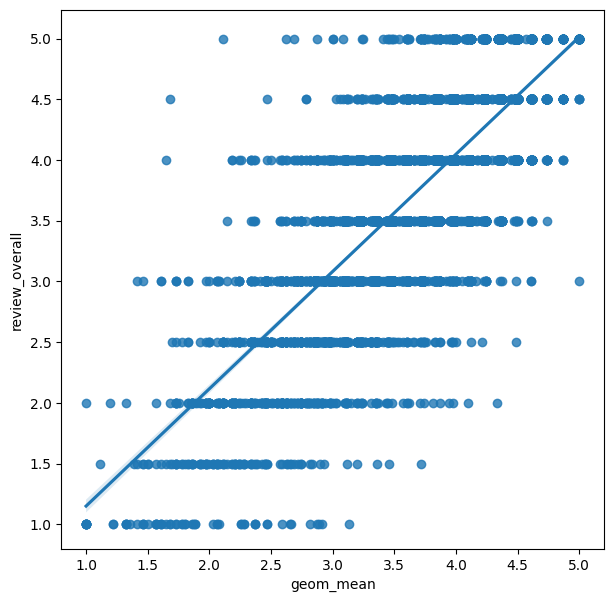

In [28]:
#fazendo uma amostragem pra fazer o plot já que a base é bem grande
data_amostra = data.sample(n=10000, random_state=1)
plt.figure(figsize=(7,7))
sns.regplot(data=data_amostra, x='geom_mean', y='review_overall')
plt.show()

In [29]:
# agora, vendo a correlação em si
data[['review_overall', 'geom_mean']].corr()

,review_overall,geom_mean
review_overall,1.000000,0.778988
geom_mean,0.778988,1.000000


Até que a correlação é forte!

Tentando agora encontrar as melhores cervejarias filtrando o df para mostrar somente as cervejas que receberam tanto overall quanto média geométrica 5/5

In [30]:
melhores_cervejas = data[(data['review_overall'] == 5) & (data['geom_mean'] == 5)]
                                            # dando display por ordem de id
display(melhores_cervejas.sort_values(by='brewery_id'))

,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid,geom_mean
45672,1,"Plzensky Prazdroj, a. s.",2003-12-07 00:01:31,5.0,5.0,5.0,Hobbz,Czech Pilsener,5.0,5.0,Pilsner Urquell,4.4,429,5.0
46509,1,"Plzensky Prazdroj, a. s.",2007-04-07 14:29:27,5.0,5.0,5.0,janubio,Czech Pilsener,5.0,5.0,Pilsner Urquell,4.4,429,5.0
45945,1,"Plzensky Prazdroj, a. s.",2010-06-14 15:26:35,5.0,5.0,5.0,Fengzi,Czech Pilsener,5.0,5.0,Pilsner Urquell,4.4,429,5.0
45950,1,"Plzensky Prazdroj, a. s.",2010-05-26 07:08:19,5.0,5.0,5.0,appenzeller,Czech Pilsener,5.0,5.0,Pilsner Urquell,4.4,429,5.0
46382,1,"Plzensky Prazdroj, a. s.",2007-12-28 07:03:07,5.0,5.0,5.0,horseblanket,Czech Pilsener,5.0,5.0,Pilsner Urquell,4.4,429,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378837,27039,The Alchemist,2010-08-03 01:20:07,5.0,5.0,5.0,stonermouse,American Double / Imperial IPA,5.0,5.0,Heady Topper,8.0,16814,5.0
378742,27039,The Alchemist,2010-12-23 00:07:01,5.0,5.0,5.0,renaud112,American Double / Imperial IPA,5.0,5.0,Heady Topper,8.0,16814,5.0
378698,27039,The Alchemist,2011-02-24 00:03:32,5.0,5.0,5.0,willyvt,American Double / Imperial IPA,5.0,5.0,Heady Topper,8.0,16814,5.0
378880,27039,The Alchemist,2011-12-07 20:58:34,5.0,5.0,5.0,nrs207,American Double / Imperial IPA,5.0,5.0,Heady Topper,8.0,16814,5.0


Fazendo um df e depois um gráfico com as cervejas que mais foram perfeitamente avaliadas (5/5 em geom mean e overall)

In [31]:
contagem_cervejas = melhores_cervejas['beer_name'].value_counts().reset_index()
contagem_cervejas.columns = ['beer_name', 'count']
contagem_cervejas = contagem_cervejas.sort_values(by='count', ascending=False)
display(contagem_cervejas)

,beer_name,count
0,Pliny The Elder,156
1,Trappist Westvleteren 12,134
2,Founders KBS (Kentucky Breakfast Stout),112
3,Pliny The Younger,92
4,Trappistes Rochefort 10,84
...,...,...
1049,Weltenburger Kloster Barock Dunkel,1
1048,Summer Of Lager,1
1047,Ridgetop Red,1
1046,Samuel Adams Blackberry Witbier,1


C:\Users\rafae\AppData\Local\Temp\ipykernel_8068\2591170936.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='beer_name', data=top_cervejas, palette='YlOrBr')


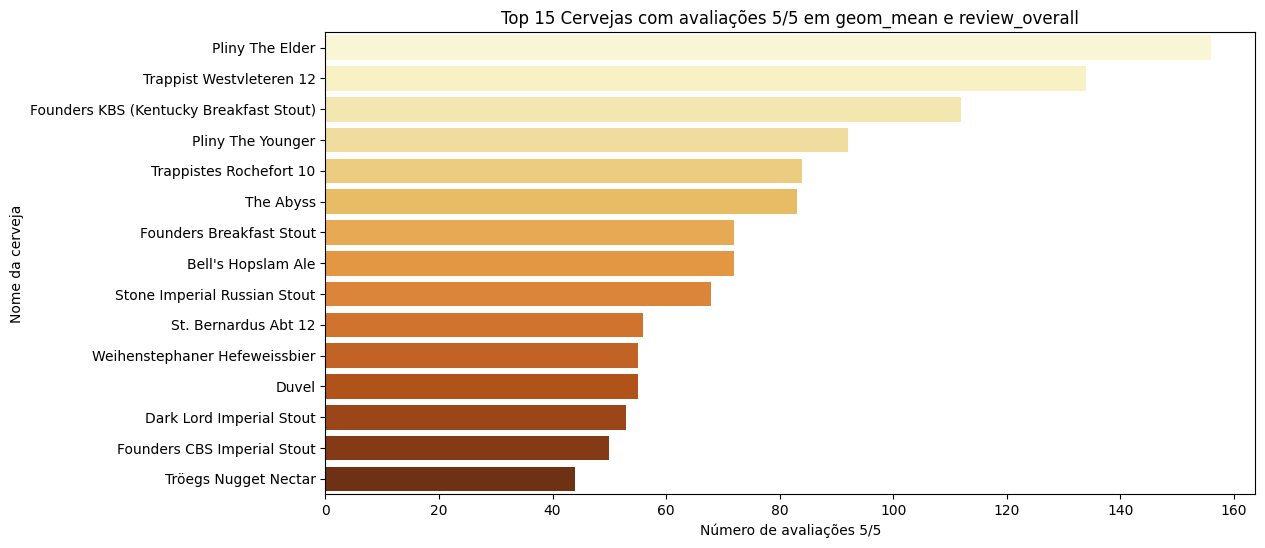

In [33]:
top_cervejas = contagem_cervejas.head(15)

# Criar o gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(x='count', y='beer_name', data=top_cervejas, palette='YlOrBr')
plt.xlabel('Número de avaliações 5/5')
plt.ylabel('Nome da cerveja')
plt.title('Top 15 Cervejas com avaliações 5/5 em geom_mean e review_overall')
plt.show()